In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
pd.set_option('display.max_columns',None)

In [6]:
train_df.shape

(10683, 11)

there are 10683 rows and 11 columns

In [7]:
test_df.shape

(2671, 10)

there are 2671 rows and 10 columns in this dataset

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


10 columns are object type and only one is integer type i.e price

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


all the columns are object type 

In [10]:
data=train_df.append(test_df,sort=False)

we have joined both the datasets

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [12]:
data.shape

(13354, 11)

now we have 13354 rows and 11 columns in our dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


now our dataset have 10 columns with object type and 1 columns have float datatype

In [14]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

we have null values in 3 columns i.e route, total stops, price

In [15]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [16]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]
data['Year']=data['Date_of_Journey'].str.split('/').str[2]

we have split date of journey in three different columns

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [18]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [19]:
data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

we have changed the dtype of date,month,year into int

In [20]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [21]:
data=data.drop(['Date_of_Journey'],axis=1)

In [22]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


we have droped date of journey column as we have separated that column into date month and year

In [23]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

In [24]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


we have simplified the arrival time column

In [25]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [26]:
data[data['Route'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


as these two column contains null values 

In [27]:
data['Total_Stops']=data['Total_Stops'].fillna('1 stop')

In [28]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [29]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [30]:

data['Stop'] = data['Total_Stops'].str.split(' ').str[0]

In [31]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [32]:
data['Stop']=data['Stop'].astype(int)
data=data.drop(['Total_Stops'],axis=1)

In [33]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


we have simplified total stops columns into stop column

In [34]:
data['Arrival_Hour'] = data['Arrival_Time'] .str.split(':').str[0]
data['Arrival_Minute'] = data['Arrival_Time'] .str.split(':').str[1]

In [35]:
data['Arrival_Hour']=data['Arrival_Hour'].astype(int)
data['Arrival_Minute']=data['Arrival_Minute'].astype(int)
data=data.drop(['Arrival_Time'],axis=1)

we have split arrival time into arrival hour and arrival minute and then dropped arrival time column

In [36]:
data['Departure_Hour'] = data['Dep_Time'] .str.split(':').str[0]
data['Departure_Minute'] = data['Dep_Time'] .str.split(':').str[1]


In [37]:
data['Departure_Hour']=data['Departure_Hour'].astype(int)
data['Departure_Minute']=data['Departure_Minute'].astype(int)
data=data.drop(['Dep_Time'],axis=1)

we have split departure time into departure hour and departure minute and then dropped departure time column

In [38]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [39]:
data['Route_1']=data['Route'].str.split('→ ').str[0]
data['Route_2']=data['Route'].str.split('→ ').str[1]
data['Route_3']=data['Route'].str.split('→ ').str[2]
data['Route_4']=data['Route'].str.split('→ ').str[3]
data['Route_5']=data['Route'].str.split('→ ').str[4]

In [40]:
data['Route_1'].fillna("None",inplace=True)
data['Route_2'].fillna("None",inplace=True)
data['Route_3'].fillna("None",inplace=True)
data['Route_4'].fillna("None",inplace=True)
data['Route_5'].fillna("None",inplace=True)

In [41]:
data['Price'].fillna((data['Price'].mean()),inplace=True)

In [42]:
data=data.drop(['Route'],axis=1)
data=data.drop(['Duration'],axis=1)

we have dropped route column and duratio column as we have already simplified it above

In [43]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [44]:
data.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

we do not have any null value now 

# eda

<AxesSubplot:xlabel='Airline', ylabel='count'>

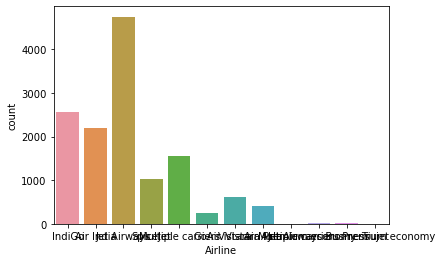

In [45]:
sns.countplot(x='Airline', data=data)

In [46]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

these are the value count of each flight

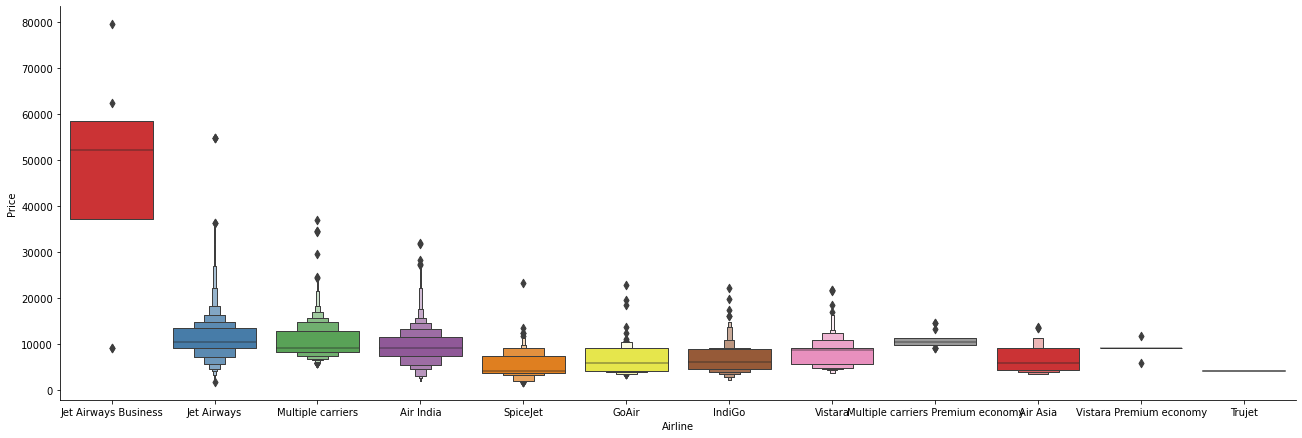

In [47]:
sns.catplot(y='Price',x="Airline",palette="Set1",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

this show the relation between price and airlines

<AxesSubplot:xlabel='Source', ylabel='count'>

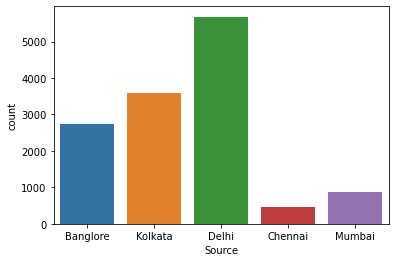

In [48]:
sns.countplot(x='Source', data=data)

most of the flight have delhi source and least is chennai

In [49]:
data['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

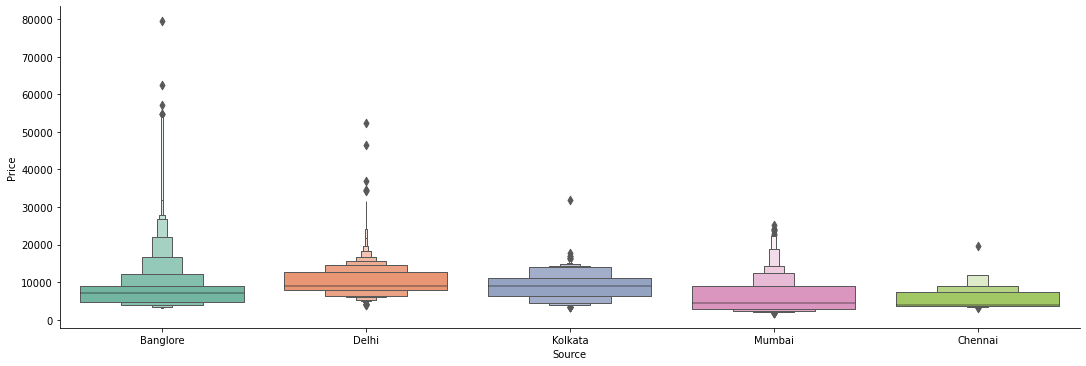

In [50]:
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),palette="Set2",kind='boxen',height=5,aspect=3)

<AxesSubplot:xlabel='Destination', ylabel='count'>

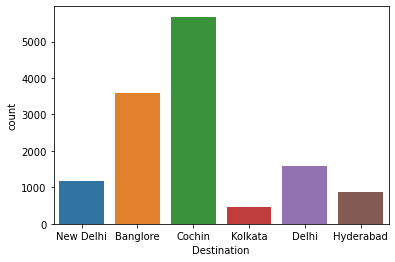

In [51]:
sns.countplot(x='Destination', data=data)

In [52]:
data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

most of peoples destination is cochin and least is kolkata

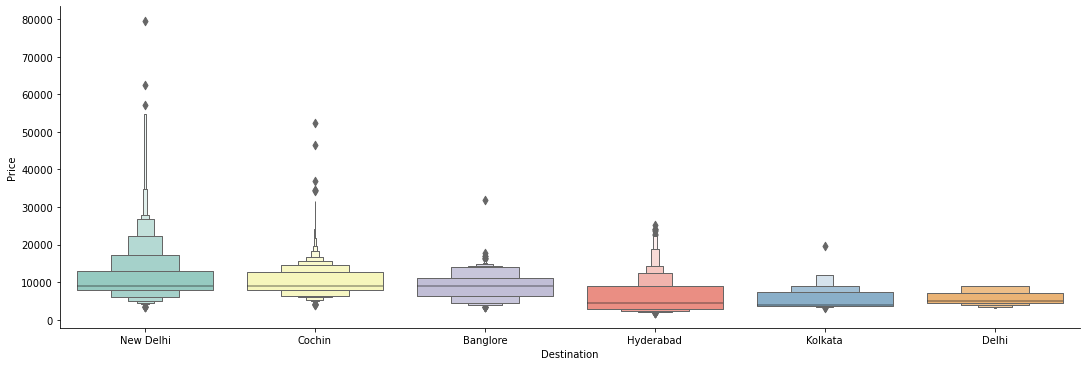

In [53]:
sns.catplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False),palette='Set3',kind='boxen',height=5,aspect=3)

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

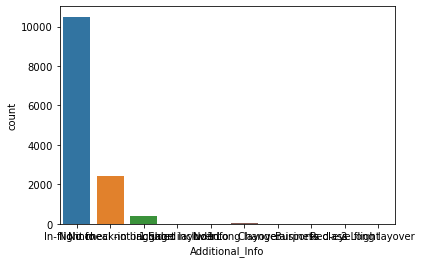

In [54]:
sns.countplot(x='Additional_Info', data=data)

In [55]:
data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

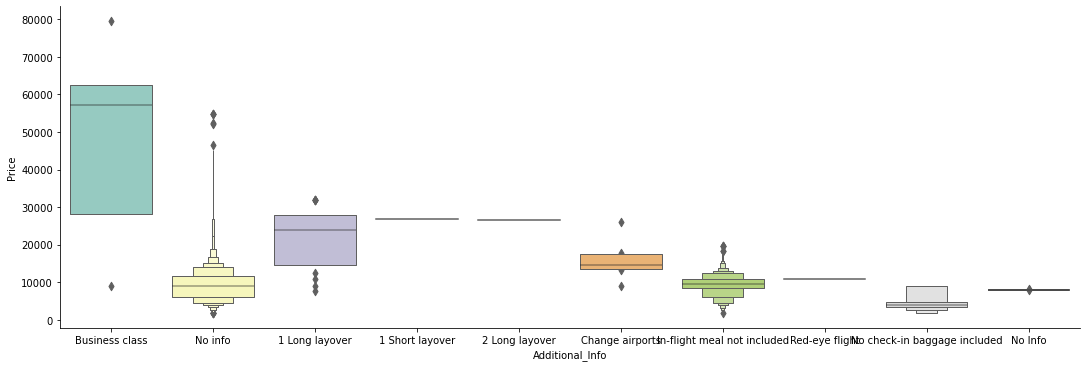

In [56]:
sns.catplot(y='Price',x='Additional_Info',data=data.sort_values('Price',ascending=False),palette='Set3',kind='boxen',height=5,aspect=3)

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWa

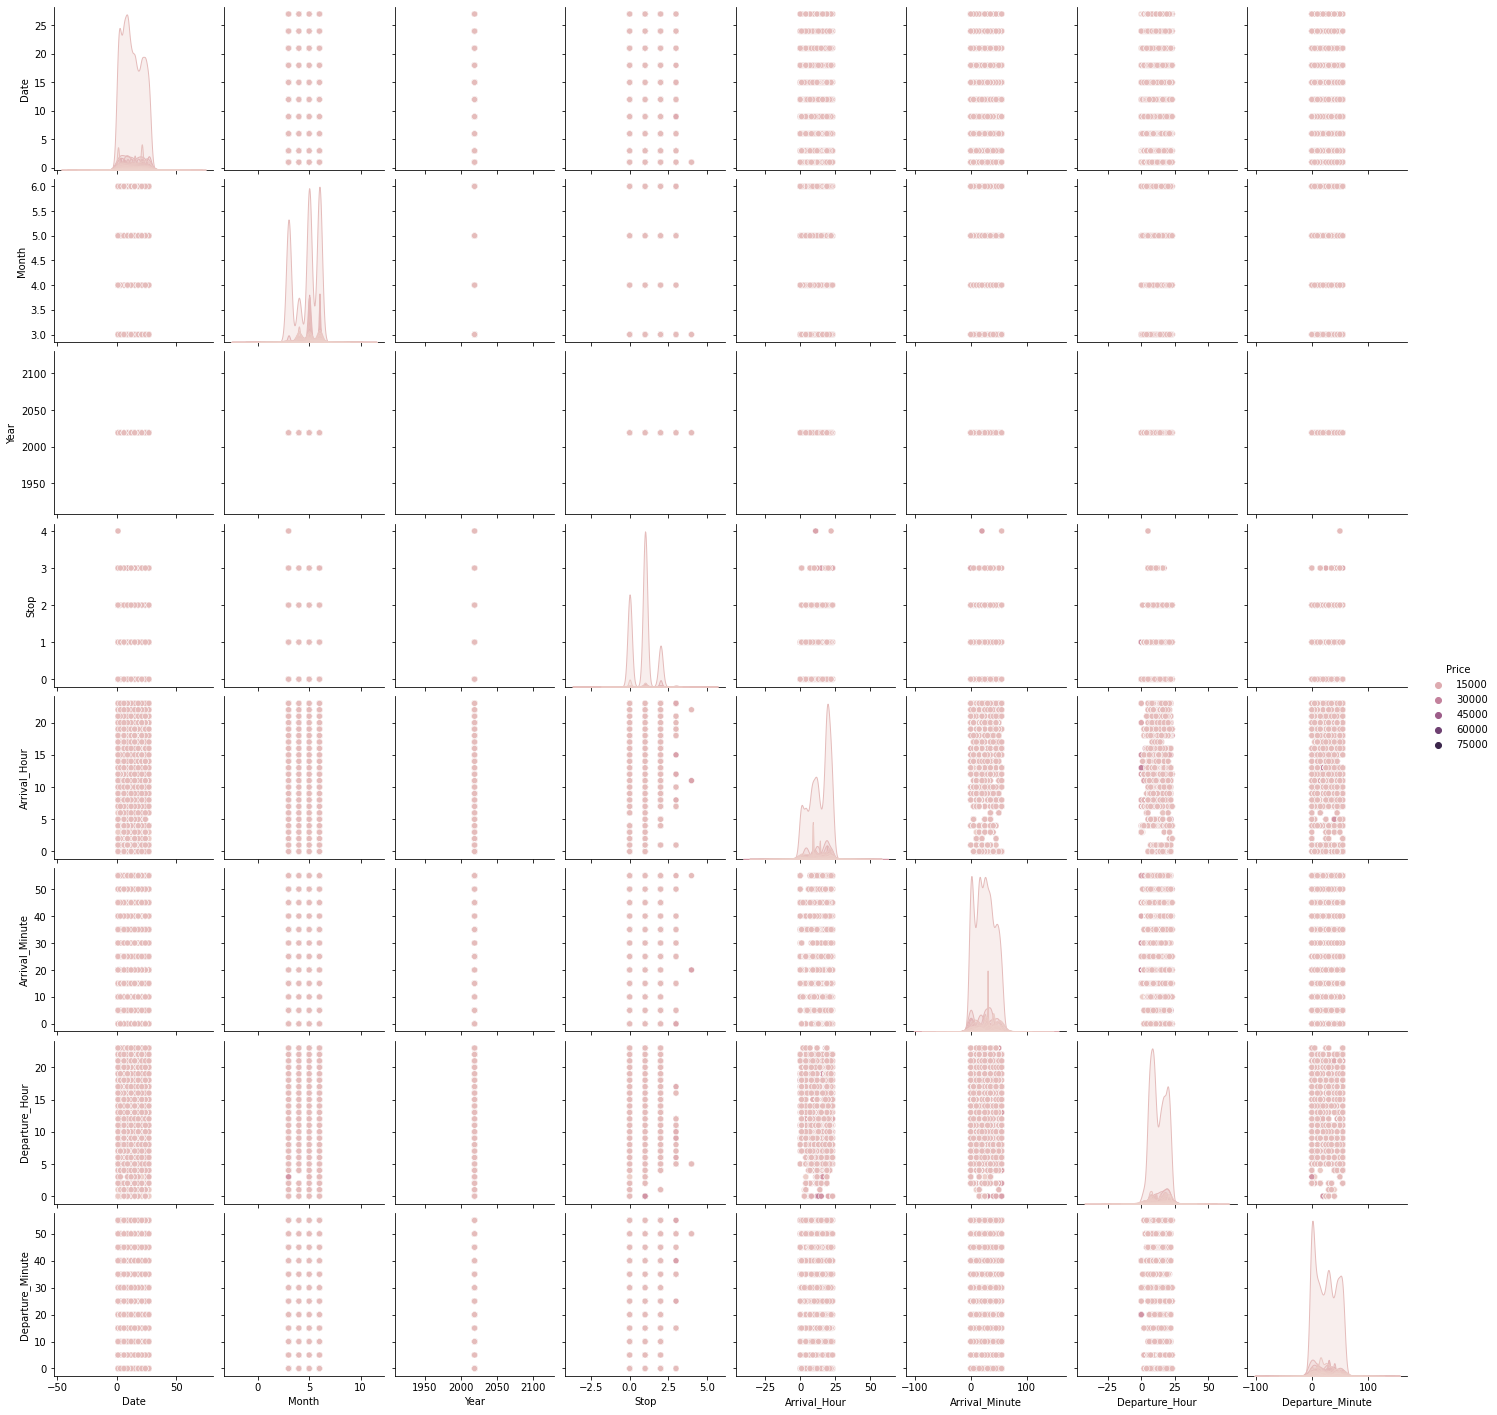

In [57]:
sns.pairplot(data,hue='Price')         #multivariate analysis

In [58]:
cor=data.corr()

In [59]:
cor

,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
Price,1.000000,-0.138160,-0.092606,NaN,0.540592,0.021585,-0.076809,0.006112,-0.021831
Date,-0.138160,1.000000,-0.035495,NaN,-0.011081,0.000982,-0.014631,-0.002970,-0.008988
Month,-0.092606,-0.035495,1.000000,NaN,0.046920,-0.003226,-0.110276,0.034494,-0.069407
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stop,0.540592,-0.011081,0.046920,NaN,1.000000,0.037154,-0.108233,-0.070709,-0.000116
Arrival_Hour,0.021585,0.000982,-0.003226,NaN,0.037154,1.000000,-0.150636,0.004296,0.043967
Arrival_Minute,-0.076809,-0.014631,-0.110276,NaN,-0.108233,-0.150636,1.000000,0.067645,-0.018133
Departure_Hour,0.006112,-0.002970,0.034494,NaN,-0.070709,0.004296,0.067645,1.000000,-0.026674
Departure_Minute,-0.021831,-0.008988,-0.069407,NaN,-0.000116,0.043967,-0.018133,-0.026674,1.000000


this shows the the correlation between the columns

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Airline"]=encoder.fit_transform(data['Airline'])
data["Source"]=encoder.fit_transform(data['Source'])
data["Destination"]=encoder.fit_transform(data['Destination'])
data["Additional_Info"]=encoder.fit_transform(data['Additional_Info'])
data["Route_1"]=encoder.fit_transform(data['Route_1'])
data["Route_2"]=encoder.fit_transform(data['Route_2'])
data["Route_3"]=encoder.fit_transform(data['Route_3'])
data["Route_4"]=encoder.fit_transform(data['Route_4'])
data["Route_5"]=encoder.fit_transform(data['Route_5'])

In [61]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


we have encoded our data

In [62]:
x=data.drop('Price',axis=1)
y=data['Price']

In [63]:
data.skew()

Airline              0.720924
Source              -0.424151
Destination          1.247893
Additional_Info     -1.784752
Price                2.026457
Date                 0.135142
Month               -0.390684
Year                 0.000000
Stop                 0.317797
Arrival_Hour        -0.384591
Arrival_Minute       0.111711
Departure_Hour       0.109087
Departure_Minute     0.159397
Route_1             -0.618133
Route_2              1.457423
Route_3              0.590398
Route_4             -2.105582
Route_5            -16.358521
dtype: float64

our data has skewness

In [64]:
from sklearn.preprocessing import power_transform
n_data=power_transform(x)
n_data=pd.DataFrame(n_data,columns=x.columns)

C:\Users\rashi\anaconda3\New folder\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [65]:
n_data.skew()

Airline             -0.017115
Source              -0.238236
Destination          0.041213
Additional_Info     -1.403977
Date                -0.198643
Month               -0.218649
Year                 0.000000
Stop                -0.059272
Arrival_Hour        -0.366820
Arrival_Minute      -0.349003
Departure_Hour      -0.104613
Departure_Minute    -0.362253
Route_1             -0.384518
Route_2              0.058730
Route_3              0.043262
Route_4             -1.992684
Route_5             18.373821
dtype: float64

In [66]:
x=n_data

# checking outliers

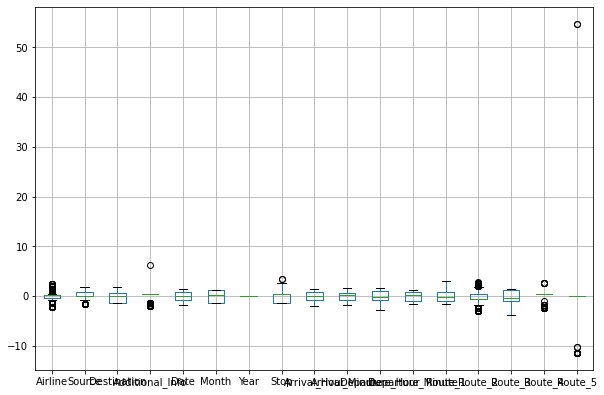

In [67]:
x.boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

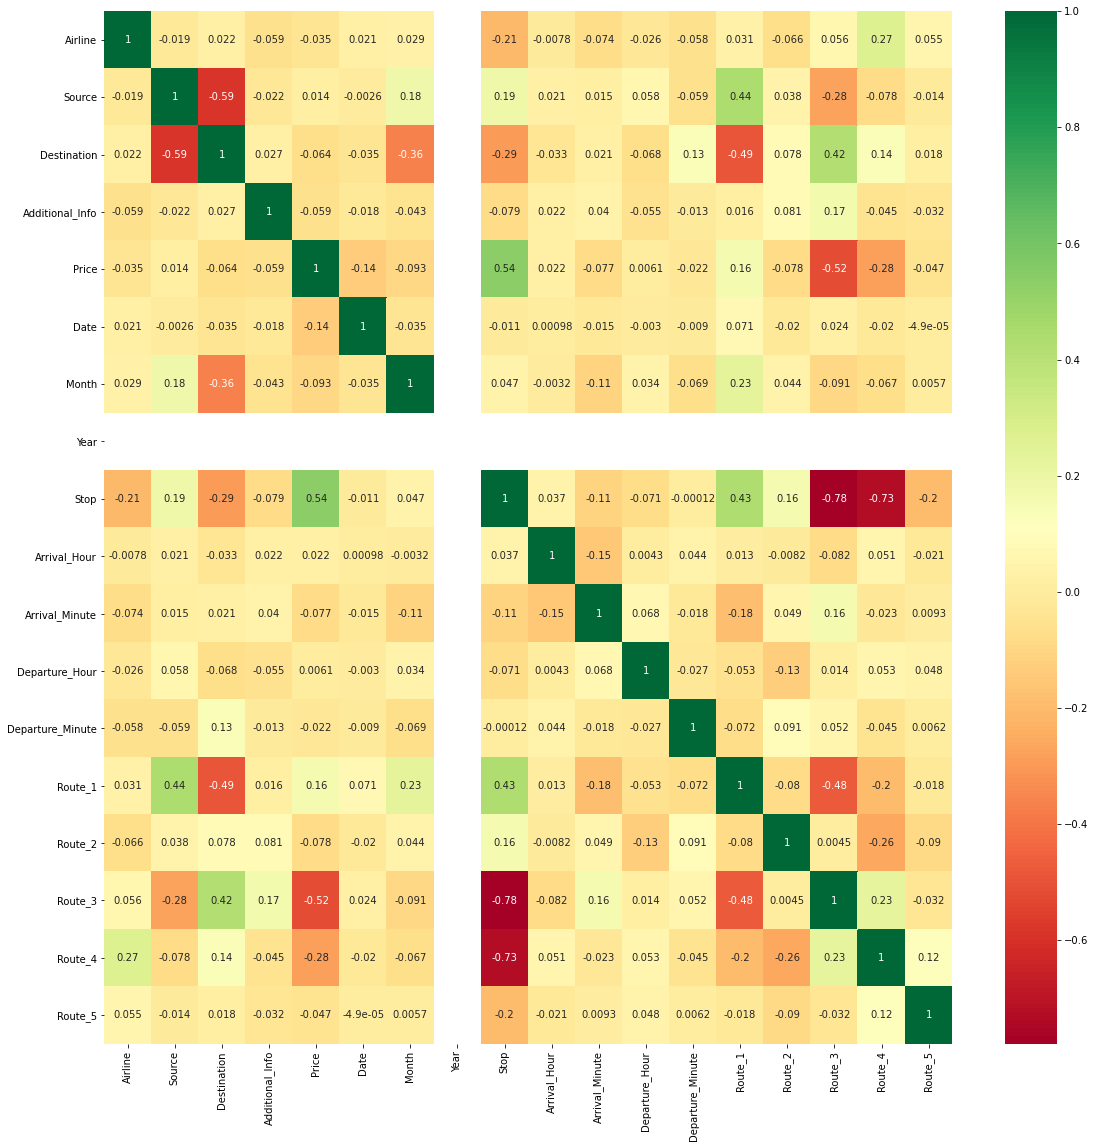

In [68]:
plt.figure(figsize=(19,19))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [69]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Price', 'Date',
       'Month', 'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [70]:
X = data.loc[:,['Airline', 'Source', 'Destination', 'Additional_Info', 'Price', 'Date',
       'Month', 'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5']]

In [71]:
Y = data.loc[:,'Price']

In [72]:
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [73]:

Y.shape

(13354,)

In [74]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [75]:
print(selection.feature_importances_)

[5.13001277e-03 1.75261613e-03 3.83886272e-03 3.84703766e-03
 7.68082661e-01 2.23970527e-03 9.27621925e-04 0.00000000e+00
 9.18587543e-02 1.85602764e-04 4.32594355e-05 1.86620557e-04
 6.67422417e-05 1.86315683e-03 1.14154386e-03 1.12802601e-01
 6.03139912e-03 1.80232296e-06]


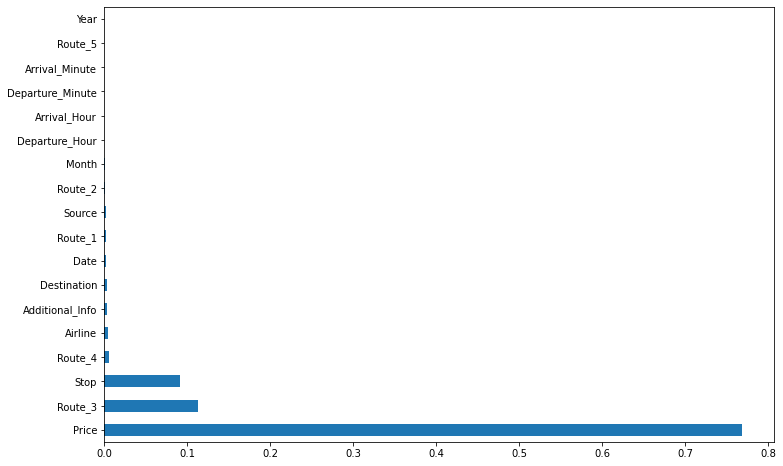

In [76]:
plt.figure(figsize=(12,8))
feat_imp = pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(25).plot(kind='barh')
plt.show()

# Training Model

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size = 0.2,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [79]:

y_pred = rf_reg.predict(X_test)

In [80]:
rf_reg.score(X_train,Y_train)

0.999913229522417

In [81]:
rf_reg.score(X_test,Y_test)

0.9869132812024131

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

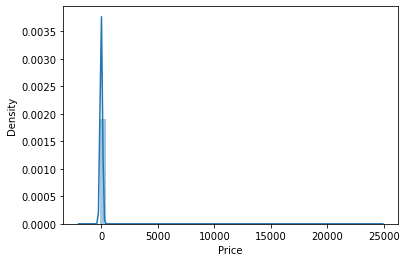

In [82]:
sns.distplot(Y_test-y_pred)

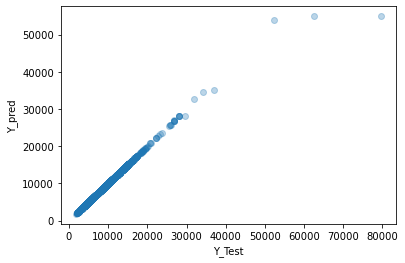

In [83]:
plt.scatter(Y_test,y_pred,alpha=0.3)
plt.xlabel("Y_Test")
plt.ylabel("Y_pred")
plt.show()

In [84]:
from sklearn import metrics

In [85]:
print("MAE: ",metrics.mean_absolute_error(Y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

MAE:  15.663653341985126
MSE:  251228.8866704756
RMSE:  501.22738020829985


In [86]:
metrics.r2_score(Y_test,y_pred)

0.9869132812024131

our r2 score is 98%

# Hyperparameter tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1300,num=13)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_spli=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [89]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_spli,
               'min_samples_leaf': min_samples_leaf}

In [90]:
rf_rand = RandomizedSearchCV(estimator=rf_reg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5
                            ,verbose=2,random_state=42,n_jobs=1)

In [91]:
rf_rand.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  17.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=  16.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
rf_rand.best_params_

{'n_estimators': 1300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [93]:
prediction = rf_rand.predict(X_test)

In [94]:
metrics.r2_score(Y_test,prediction)

0.9850416152755335

In [95]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 16.709933739837158
MSE: 287159.707398108
RMSE: 535.8728462966826


In [96]:
import pickle
file = open('flight_price_rf.pkl','wb')
pickle.dump(rf_reg,file)


In [97]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)


In [98]:
y_prediction = forest.predict(X_test)


In [99]:
metrics.r2_score(Y_test, y_prediction)

0.9869132812024131